Introduction:
In this project, I am visualizing and analyzing data from my robot's IMU (Inertial Measurement Unit) sensor. Robots are used in a variety of scenarios, and IMU data is really important. This data includes data on acceleration values, velocities, and positions, and orientation (roll, pitch, yaw) data. My data generated in real-time by my robot's Adafruit 9-DOF Fusion Breakout IMU, and logged in a CSV file. My goals is to take the imu_data.csv file produced my robot, and break it down, and visualize it. This would allow me to visualize what the robot was doing after a run, and analyze it's behavior based on the data.

Data Sources: The csv data, imu_data.csv is produced real-time by the robot I built and programmed for the Northeastern University Robotics Club.

Index(['Time', 'AccelX', 'AccelY', 'AccelZ', 'VelX', 'VelY', 'VelZ', 'PosX',
       'PosY', 'PosZ', 'Roll', 'Pitch', 'Yaw'],
      dtype='object')


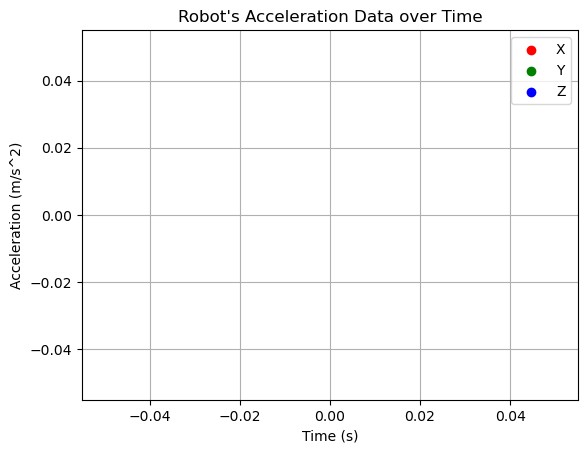

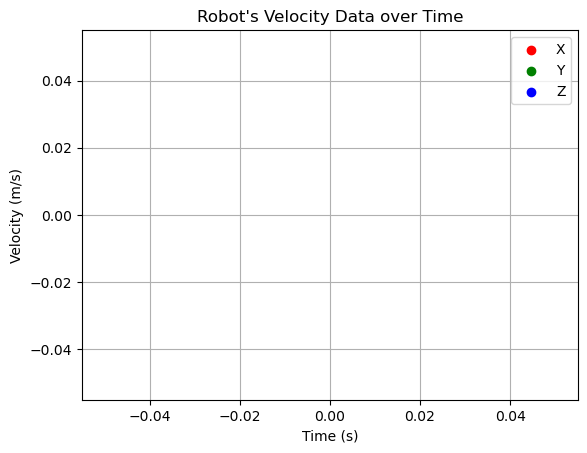

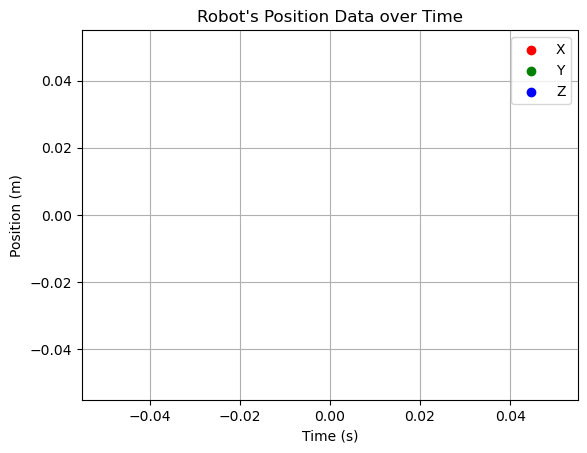

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


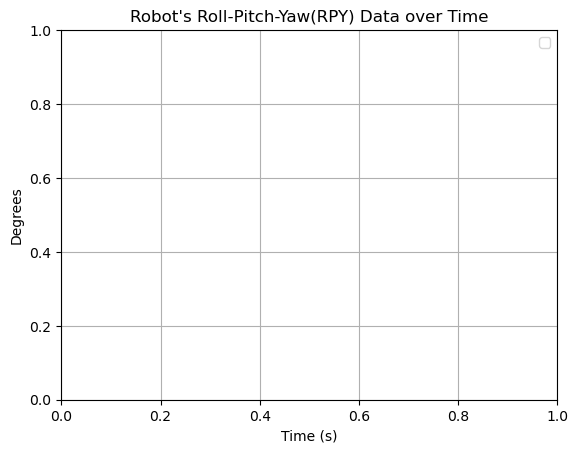

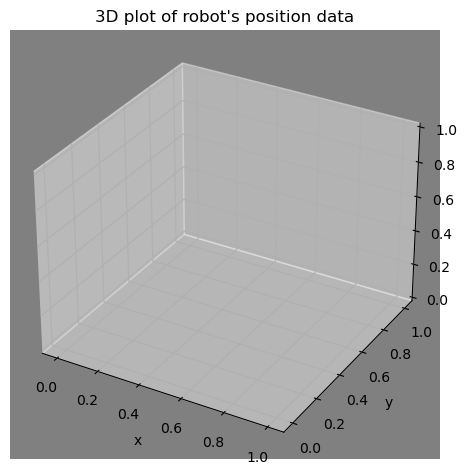

In [8]:
#import imu data as a csv
#read a pandas dataframe from the csv
#should be accel x,y,z, and roll pitch yaw data
#linear interpolate (lerp) positions between values

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
from sklearn.linear_model import LinearRegression

#get csv data from robot, and put it into a pandas dataframe
# header=['Time','AccelX', 'AccelY','AccelZ', 'VelX', 'VelY', 'VelZ', 'PosX', 'PosY', 'PosZ', 'Roll', 'Pitch', 'Yaw']
df = pd.read_csv("./imu_data.csv", sep =',')
print(df.columns)
#Drop the accelZ and velocityZ data because won't be used in my analysis
#df.drop(['AccelZ','VelZ'], axis=1, inplace=True)

#plot the acceleration data in a 2D plot:
fig, ax = plt.subplots()
ax.scatter(df["Time"], df["AccelX"], c='red', label='X')
ax.scatter(df["Time"], df["AccelY"],c='green', label='Y')
ax.scatter(df["Time"], df["AccelZ"],c='blue', label='Z')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Robot\'s Acceleration Data over Time')
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots()
ax.scatter(df["Time"], df["VelX"], c='red', label='X')
ax.scatter(df["Time"], df["VelY"], c='green', label='Y')
ax.scatter(df["Time"], df["VelZ"], c='blue', label='Z')


plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Robot\'s Velocity Data over Time')
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots()
ax.scatter(df["Time"], df["PosX"],c='red', label='X')
ax.scatter(df["Time"], df["PosY"], c='green', label='Y')
ax.scatter(df["Time"], df["PosZ"], c='blue', label='Z')


plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Robot\'s Position Data over Time')
plt.grid()
plt.legend()
plt.show()

fig = plt.figure()
ax.plot(df["Time"], df["Roll"], c='red', label='Roll')
ax.plot(df["Time"], df["Pitch"], c='green', label = 'Pitch')
ax.plot(df["Time"], df["Yaw"], c='blue', label='Yaw')

plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.title('Robot\'s Roll-Pitch-Yaw(RPY) Data over Time')
plt.grid()
plt.legend()
plt.show()



#plot position data on a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_facecolor(color=(0.5,0.5,0.5))

x = df["PosX"]
y = df["PosY"]
z = df["PosZ"]

ax.scatter(x, y, z, marker='o', c='r')
ax.plot(x, y, z, c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title("3D plot of robot's position data")
plt.tight_layout()
plt.show()







    